## Sequence dataset generation

### Reading data

Reading pre-processed Uniprot data for all organisms:

In [64]:
from subpred.util import load_df

sequences = load_df("uniprot")
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
A0A0C5B5G6,MT-RNR1,Mitochondrial-derived peptide MOTS-c (Mitochon...,True,1,MRWQEMGYIFYPRKLR,9606
A0A1B0GTW7,CIROP LMLN2,Ciliated left-right organizer metallopeptidase...,True,1,MLLLLLLLLLLPPLVLRVAASRCLHDETQKSVSLLRPPFSQLPSKS...,9606
A0JNW5,BLTP3B KIAA0701 SHIP164 UHRF1BP1L,Bridge-like lipid transfer protein family memb...,True,1,MAGIIKKQILKHLSRFTKNLSPDKINLSTLKGEGELKNLELDEEVL...,9606
A0JP26,POTEB3,POTE ankyrin domain family member B3,True,1,MVAEVCSMPAASAVKKPFDLRSKMGKWCHHRFPCCRGSGKSNMGTS...,9606
A0PK11,CLRN2,Clarin-2,True,1,MPGWFKKAWYGLASLLSFSSFILIIVALVVPHWLSGKILCQTGVDL...,9606
...,...,...,...,...,...,...
X5L4R4,NOD-2,Nucleotide-binding oligomerization domain-cont...,False,2,MSPGCYKGWPFNCHLSHEEDKRRNETLLQEAETSNLQITASFVSGL...,586796
X5MBL2,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,KVLYDRAFNSSDDQSALVYLLLKEKDKWADRIFIEHKYYLNGYWLD...,3352
X5MFI4,GT34D,"Putative galacto(Gluco)mannan alpha-1,6-galact...",False,2,MDEDVLCKGPLHGGSARSLKGSLKRLKRIMESLNDGLIFMGGAVSA...,3352


### Selecting organism

Filtering for *E. Coli* Strain K12: 

In [65]:
sequences = sequences[sequences.organism_id == 83333]
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333
P33668,ybbC b0498 JW0487,Uncharacterized protein YbbC,True,2,MKYSSIFSMLSFFILFACNETAVYGSDENIIFMRYVEKLHLDKYSV...,83333


### Filtering

Keeping proteins that have been manually reviewed, or have sequence evidence at protein level:

In [66]:
sequences = sequences[(sequences.protein_existence == 1) | (sequences.reviewed)]
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,True,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...,83333
P76154,ydfK b1544 JW1537,Cold shock protein YdfK,True,2,MKSKDTLKWFPAQLPEVRIILGDAVVEVAKQGRPINTRTLLDYIEG...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333


### Sequence clustering the proteins:

The clustering at 70% sequence identity does not remove a lot of proteins for *E. coli*. This is different for other organisms. 

In [67]:
from subpred.cdhit import cd_hit

clusters = cd_hit(sequences=sequences.sequence, identity_threshold=70)
sequences = sequences.loc[clusters]
sequences

cd-hit: clustered 3277 sequences into 3236 clusters at threshold 70


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P00509,aspC b0928 JW0911,Aspartate aminotransferase (AspAT) (EC 2.6.1.1...,True,1,MFENITAAPADPILGLADLFRADERPGKINLGIGVYKDETGKTPVL...,83333
P00803,lepB b2568 JW2552,Signal peptidase I (SPase I) (EC 3.4.21.89) (L...,True,1,MANMFALILVIATLVTGILWCVDKFFFAPKRRERQAAAQAAAGDSL...,83333
P00804,lspA lsp b0027 JW0025,Lipoprotein signal peptidase (EC 3.4.23.36) (P...,True,1,MSQSICSTGLRWLWLVVVVLIIDLGSKYLILQNFALGDTVPLFPSL...,83333
P00861,lysA b2838 JW2806,Diaminopimelate decarboxylase (DAP decarboxyla...,True,1,MPHSLFSTDTDLTAENLLRLPAEFGCPVWVYDAQIIRRQIAALKQF...,83333
P00946,manA pmi b1613 JW1605,Mannose-6-phosphate isomerase (EC 5.3.1.8) (Ph...,True,1,MQKLINSVQNYAWGSKTALTELYGMENPSSQPMAELWMGAHPKSSS...,83333
...,...,...,...,...,...,...
P77564,ydhW b1672 JW1662,Uncharacterized protein YdhW,True,2,MGKMNHQDELPLAKVSEVDEAKRQWLQGMRHPVDTVTEPEPAEILA...,83333
P76157,ynfN b1551 JW5254,Uncharacterized protein YnfN,True,2,MREYPNGEKTHLTVMAAGFPSLTGDHKVIYVAADRHVTSEEILEAA...,83333
P0AEG8,dsrB b1952 JW1936,Protein DsrB,True,2,MKVNDRVTVKTDGGPRRPGVVLAVEEFSEGTMYLVSLEDYPLGIWF...,83333


### Filtering for transmembrane transporters using GO

#### Loading all GO Uniprot annotations

Read pre-processed Uniprot GO annotations:

In [68]:
go_annotations_uniprot = load_df("go")
go_annotations_uniprot


,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A009FND8,enables,GO:0000166,IEA,F
1,A0A009FND8,enables,GO:0005524,IEA,F
2,A0A009FND8,enables,GO:0051082,IEA,F
3,A0A009FND8,enables,GO:0140662,IEA,F
4,A0A009FND8,involved_in,GO:0006457,IEA,P
...,...,...,...,...,...
7452013,Z9JND5,enables,GO:0000166,IEA,F
7452014,Z9JND5,enables,GO:0005524,IEA,F
7452015,Z9JND5,enables,GO:0051082,IEA,F
7452016,Z9JND5,enables,GO:0140662,IEA,F


#### Dataset of transmembrane transport GO terms in E Coli

- Used to filter proteins for transmembrane transporters

**Creating dataset of transporter GO term annotations**

Filter for GO terms that are descendants of "transmembrane transporter activity

GO annotations for the clustered sequence dataset from *E Coli.*

In [69]:
from subpred.ontology import GeneOntology, GO_FILE

go_owl = GeneOntology(GO_FILE)
transmembrane_transport_go_terms = go_owl.get_descendants(
    go_owl.get_identifier("transmembrane transporter activity")
)
# filter GO annotations for descendants of transmembrane transporter activity
go_annotations_tmtp = go_annotations_uniprot[
    go_annotations_uniprot.go_id.isin(transmembrane_transport_go_terms)
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,go_id,evidence_code,aspect
0,A0A014M993,enables,GO:0015288,IEA,F
1,A0A014M993,enables,GO:0015481,IEA,F
2,A0A014M993,enables,GO:0042958,IEA,F
3,A0A022PEV8,enables,GO:0015288,IEA,F
4,A0A022PEV8,enables,GO:0015481,IEA,F
...,...,...,...,...,...
94155,X5M917,enables,GO:0022857,IBA,F
94156,Z4YKJ7,enables,GO:0015172,IEA,F
94157,Z4YKJ7,enables,GO:0015179,IEA,F
94158,Z4YKJ7,enables,GO:0015293,IEA,F


In [70]:
# add ancestors of all remaining terms
go_annotations_tmtp = go_annotations_tmtp.assign(
    ancestors=go_annotations_tmtp.go_id.transform(
        lambda go_id: go_owl.get_ancestors(go_id)
    )
)
assert go_annotations_tmtp.apply(lambda row: row.go_id in row.ancestors, axis=1).all()
go_annotations_tmtp


,Uniprot,qualifier,go_id,evidence_code,aspect,ancestors
0,A0A014M993,enables,GO:0015288,IEA,F,"{GO:0015267, GO:0022829, GO:0003674, GO:002285..."
1,A0A014M993,enables,GO:0015481,IEA,F,"{GO:0015267, GO:0022829, GO:0003674, GO:002285..."
2,A0A014M993,enables,GO:0042958,IEA,F,"{GO:0003674, GO:0022857, GO:0005215, GO:002288..."
3,A0A022PEV8,enables,GO:0015288,IEA,F,"{GO:0015267, GO:0022829, GO:0003674, GO:002285..."
4,A0A022PEV8,enables,GO:0015481,IEA,F,"{GO:0015267, GO:0022829, GO:0003674, GO:002285..."
...,...,...,...,...,...,...
94155,X5M917,enables,GO:0022857,IBA,F,"{GO:0003674, GO:0022857, GO:0005215}"
94156,Z4YKJ7,enables,GO:0015172,IEA,F,"{GO:0005342, GO:0046943, GO:0003674, GO:002285..."
94157,Z4YKJ7,enables,GO:0015179,IEA,F,"{GO:0005342, GO:0046943, GO:0003674, GO:002285..."
94158,Z4YKJ7,enables,GO:0015293,IEA,F,"{GO:0015293, GO:0003674, GO:0022857, GO:000521..."


In [71]:
# add ancestor annotations
go_annotations_tmtp = (
    go_annotations_tmtp.drop("go_id", axis=1)
    .rename(columns={"ancestors": "go_id"})
    .explode("go_id")
)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A014M993,enables,IEA,F,GO:0015267
0,A0A014M993,enables,IEA,F,GO:0022829
0,A0A014M993,enables,IEA,F,GO:0003674
0,A0A014M993,enables,IEA,F,GO:0022857
0,A0A014M993,enables,IEA,F,GO:0005215
...,...,...,...,...,...
94159,Z4YKJ7,enables,IEA,F,GO:0046943
94159,Z4YKJ7,enables,IEA,F,GO:0022857
94159,Z4YKJ7,enables,IEA,F,GO:0022804
94159,Z4YKJ7,enables,IEA,F,GO:0015171


In [72]:
# filter GO annotations and their ancestors for descendants of transmembrane transporter activity again
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.go_id.isin(transmembrane_transport_go_terms)
].reset_index(drop=True)
go_annotations_tmtp = go_annotations_tmtp.drop_duplicates().reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A014M993,enables,IEA,F,GO:0015267
1,A0A014M993,enables,IEA,F,GO:0022829
2,A0A014M993,enables,IEA,F,GO:0022857
3,A0A014M993,enables,IEA,F,GO:0015288
4,A0A014M993,enables,IEA,F,GO:0022803
...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0015294
581848,Z4YKJ7,enables,IEA,F,GO:0015081
581849,Z4YKJ7,enables,IEA,F,GO:0008509
581850,Z4YKJ7,enables,IEA,F,GO:0015370


In [73]:
# annotate with labels
go_annotations_tmtp = go_annotations_tmtp.assign(
    go_term=go_annotations_tmtp.go_id.transform(go_owl.get_label)
)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A0A014M993,enables,IEA,F,GO:0015267,channel activity
1,A0A014M993,enables,IEA,F,GO:0022829,wide pore channel activity
2,A0A014M993,enables,IEA,F,GO:0022857,transmembrane transporter activity
3,A0A014M993,enables,IEA,F,GO:0015288,porin activity
4,A0A014M993,enables,IEA,F,GO:0022803,passive transmembrane transporter activity
...,...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0015294,solute:cation symporter activity
581848,Z4YKJ7,enables,IEA,F,GO:0015081,sodium ion transmembrane transporter activity
581849,Z4YKJ7,enables,IEA,F,GO:0008509,anion transmembrane transporter activity
581850,Z4YKJ7,enables,IEA,F,GO:0015370,solute:sodium symporter activity


In [74]:
# Filtering for qualifier. How many samples do we lose?
print(
    f"Percentage of transmembrane transporter annotations with enables qualifier: {go_annotations_tmtp[go_annotations_tmtp.qualifier == 'enables'].shape[0] / go_annotations_tmtp.shape[0] * 100:.3f}%"
)
go_annotations_tmtp = go_annotations_tmtp[go_annotations_tmtp.qualifier == "enables"]
go_annotations_tmtp


Percentage of transmembrane transporter annotations with enables qualifier: 97.408%


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A0A014M993,enables,IEA,F,GO:0015267,channel activity
1,A0A014M993,enables,IEA,F,GO:0022829,wide pore channel activity
2,A0A014M993,enables,IEA,F,GO:0022857,transmembrane transporter activity
3,A0A014M993,enables,IEA,F,GO:0015288,porin activity
4,A0A014M993,enables,IEA,F,GO:0022803,passive transmembrane transporter activity
...,...,...,...,...,...,...
581847,Z4YKJ7,enables,IEA,F,GO:0015294,solute:cation symporter activity
581848,Z4YKJ7,enables,IEA,F,GO:0015081,sodium ion transmembrane transporter activity
581849,Z4YKJ7,enables,IEA,F,GO:0008509,anion transmembrane transporter activity
581850,Z4YKJ7,enables,IEA,F,GO:0015370,solute:sodium symporter activity


Before filtering for the electronically inferred IEA annotations, we will only keep annotations for the clustered *E. coli* sequence dataset above, to see what the actual difference in sample count is. *E. coli* is a model organism, and therefore there should be more experimentally verified annotations compared to the thousands of other organisms in the dataset with similar proteins. 

The percentage of IEA annotations in *E. coli* should be much lower than for the average Uniprot organism.

In [75]:
assert not sequences.duplicated().any()
f"% of e coli proteins with transmembrane transport annotation after preprocessing and clustering: {sequences[sequences.index.isin(go_annotations_tmtp.Uniprot)].shape[0]/sequences.shape[0]*100:.2f}%"


'% of e coli proteins with transmembrane transport annotation after preprocessing and clustering: 14.52%'

In [76]:
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.Uniprot.isin(sequences.index)
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A5A627,enables,IDA,F,GO:0005253,anion channel activity
1,A5A627,enables,IDA,F,GO:0015267,channel activity
2,A5A627,enables,IDA,F,GO:0015075,ion transmembrane transporter activity
3,A5A627,enables,IDA,F,GO:0008509,anion transmembrane transporter activity
4,A5A627,enables,IDA,F,GO:0015103,inorganic anion transmembrane transporter acti...
...,...,...,...,...,...,...
7374,Q6BEX0,enables,IEA,F,GO:0022804,active transmembrane transporter activity
7375,Q6BEX0,enables,IEA,F,GO:0043211,ABC-type carbohydrate transporter activity
7376,Q6BEX0,enables,IEA,F,GO:0015399,primary active transmembrane transporter activity
7377,Q6BEX0,enables,IEA,F,GO:0015145,monosaccharide transmembrane transporter activity


<AxesSubplot:>

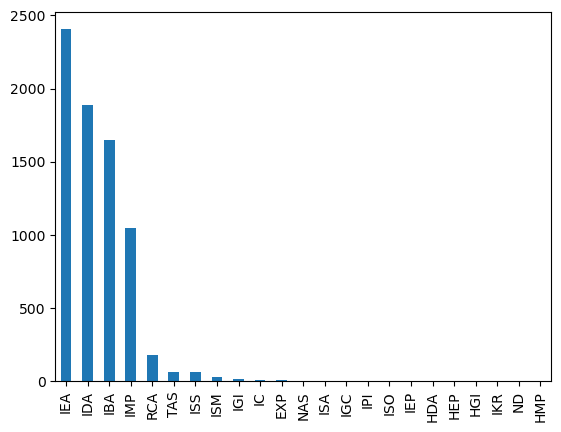

In [77]:
# filter for evidence code. how many samples do we lose?
go_annotations_tmtp.evidence_code.value_counts().plot.bar()


Most annotations have experimental evidence!

<AxesSubplot:>

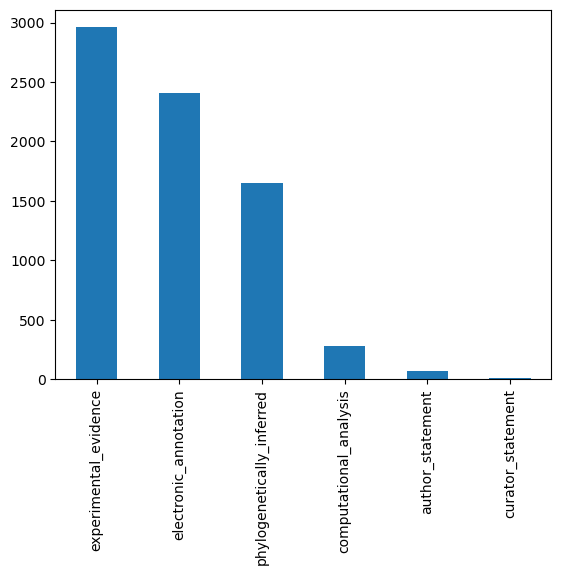

In [78]:
from subpred.ontology import EVIDENCE_CODE_TO_DESCRIPTION

go_annotations_tmtp.evidence_code.map(
    EVIDENCE_CODE_TO_DESCRIPTION
).value_counts().plot.bar()


Another point is that the GO annotation dataset also contains Uniprot annotations assigned by InterPro. There can be cases where the same annotation is in the dataset twice, where one of those annotations has an IEA annotation while the other one does not. What is the actual difference?

In [79]:
tmp = (
    go_annotations_tmtp[go_annotations_tmtp.evidence_code != "IEA"]
    .drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
print(
    f"Without IEA terms: {tmp.shape[0]} annotations in {tmp.Uniprot.unique().shape[0]} proteins."
)
tmp = (
    go_annotations_tmtp.drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
print(
    f"With IEA terms: {tmp.shape[0]} annotations in {tmp.Uniprot.unique().shape[0]} proteins."
)


Without IEA terms: 3348 annotations in 357 proteins.
With IEA terms: 4172 annotations in 470 proteins.


For now, we will filter out the IEA terms and only keep the verified data.

In [80]:
# filter for evidence codes:
go_annotations_tmtp = go_annotations_tmtp[
    go_annotations_tmtp.evidence_code != "IEA"
].reset_index(drop=True)
go_annotations_tmtp


,Uniprot,qualifier,evidence_code,aspect,go_id,go_term
0,A5A627,enables,IDA,F,GO:0005253,anion channel activity
1,A5A627,enables,IDA,F,GO:0015267,channel activity
2,A5A627,enables,IDA,F,GO:0015075,ion transmembrane transporter activity
3,A5A627,enables,IDA,F,GO:0008509,anion transmembrane transporter activity
4,A5A627,enables,IDA,F,GO:0015103,inorganic anion transmembrane transporter acti...
...,...,...,...,...,...,...
4969,Q59385,enables,IBA,F,GO:0015399,primary active transmembrane transporter activity
4970,Q59385,enables,IBA,F,GO:0005375,copper ion transmembrane transporter activity
4971,Q59385,enables,IBA,F,GO:0022857,transmembrane transporter activity
4972,Q59385,enables,IBA,F,GO:0022804,active transmembrane transporter activity


Now, there are still some annotations left with identical uniprot accession and go term, but different evidence codes. This happens because the GO dataset contains annotations made both by Uniprot and by InterPro, and they can assign different evidence codes. The next step is to remove the columns that we no longer need, and delete duplicates:

In [81]:
go_annotations_tmtp = (
    go_annotations_tmtp.drop(["qualifier", "evidence_code", "aspect"], axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)


In [82]:
# make backup of entire (filtered) genome, since we need a reference set later for the annotations
sequences_all = sequences.copy()
sequences = sequences[sequences.index.isin(go_annotations_tmtp.Uniprot)]
sequences


,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P03959,kdpA b0698 JW0686,Potassium-transporting ATPase potassium-bindin...,True,1,MAAQGFLLIATFLLVLMVLARPLGSGLARLINDIPLPGTTGVERVL...,83333
P05825,fepA fep feuB b0584 JW5086,Ferrienterobactin receptor (Enterobactin outer...,True,1,MNKKIHSLALLVNLGIYGVAQAQEPTDTPVSHDDTIVVTAAEQNLQ...,83333
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0AAD6,sdaC dcrA b2796 JW2767,Serine transporter SdaC (H(+)/L-serine symport...,True,1,METTQTSTIASKDSRSAWRKTDTMWMLGLYGTAIGAGVLFLPINAG...,83333
...,...,...,...,...,...,...
P77328,ybbY glxB4 b0513 JW0501,Putative purine permease YbbY,True,1,MFNFAVSRESLLSGFQWFFFIFCNTVVVPPTLLSAFQLPQSSLLTL...,83333
P76198,ydiN b1691 JW5274,Inner membrane transport protein YdiN,True,1,MSQNKAFSTPFILAVLCIYFSYFLHGISVITLAQNMSSLAEKFSTD...,83333
P33011,yeeA b2008 JW1990,Inner membrane protein YeeA,True,1,MRADKSLSPFEIRVYRHYRIVHGTRVALAFLLTFLIIRLFTIPEST...,83333


#### 

## Feature generation

Here, we will use PSSM and protein embeddings features to encode the protein sequences into vectors of length *n*.

### ProtNLM

One of the most reliable features at the moment seems to be ProtNLM, which provides NLP embeddings for individual proteins. Swissprot has pre-calculated embeddings for all *E. Coli* proteins available for download. 

There is also ProtT5, which can be calcualted for new proteins.

In [83]:
import h5py
import pandas as pd
import numpy as np


def read_uniprot_embedding(h5_path: str):
    with h5py.File(h5_path, "r") as file:
        embeddings_dict = {
            sequence_id: np.array(embedding) for sequence_id, embedding in file.items()
        }
        return pd.DataFrame.from_dict(embeddings_dict, orient="index")


feature_protnlm = read_uniprot_embedding("/home/ad/protnlm_test/ecoli-per-protein.h5")
feature_protnlm


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
A0A385XJ53,0.061157,0.082031,0.001612,0.039703,-0.020401,0.034180,-0.004898,-0.057495,0.023514,-0.089600,...,0.032349,-0.059021,-0.021179,-0.051971,0.054962,-0.005638,-0.088074,-0.094727,-0.043701,-0.071533
A0A385XJE6,0.047943,0.122864,0.007145,0.014442,0.024536,0.034729,-0.040802,-0.031281,0.009224,-0.065063,...,-0.004765,0.001526,0.021637,-0.024689,0.042328,-0.009949,-0.060638,-0.045258,-0.067078,0.024902
A0A385XJK5,0.050293,0.093811,-0.043182,-0.043671,-0.029007,-0.071594,0.019318,-0.126831,0.006989,-0.072693,...,0.045349,-0.014725,0.029755,-0.141113,-0.025711,0.098572,-0.029022,0.077271,-0.000576,-0.016922
A0A385XJL2,0.039551,0.090271,-0.019913,0.009315,-0.047882,-0.038605,0.059692,-0.034180,0.008598,-0.089661,...,0.049866,-0.025406,0.007912,-0.066223,0.031174,0.077637,0.030319,0.118652,0.055847,-0.060638
A0A385XJL4,0.008354,0.159546,0.024719,0.047485,0.031525,0.043854,-0.046173,-0.039490,0.017197,-0.031097,...,-0.040344,-0.025070,0.058197,-0.053284,0.074280,-0.032410,-0.082153,-0.038849,-0.109070,-0.011330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q93K97,0.043854,0.006367,-0.031769,0.036469,0.020828,0.040802,-0.007046,-0.109863,0.037109,-0.007458,...,-0.020798,0.034088,0.026230,-0.078735,0.013145,0.006065,-0.043488,-0.061035,-0.018387,-0.012543
Q9XB42,-0.001819,0.088806,-0.038422,0.023849,-0.067871,0.024200,0.062622,-0.184937,0.071777,0.039307,...,0.045532,-0.050568,-0.017609,-0.083496,-0.017700,0.008072,-0.038635,0.016205,0.038605,0.015205
Q9Z3A0,0.006672,0.109619,-0.061584,0.024643,-0.006783,-0.079468,-0.015144,-0.142212,0.071228,0.038208,...,0.029312,0.003822,0.022324,-0.174927,0.006115,0.036255,-0.054504,-0.008636,-0.030502,0.061249
U3PVA8,0.036987,-0.017639,-0.028152,-0.019852,0.025330,0.019958,0.012833,-0.129395,-0.018860,-0.003590,...,-0.029663,0.032928,0.026566,-0.147827,-0.055145,-0.061310,0.017197,0.147217,0.019318,-0.080444


**How many proteins in the dataset have embeddings available in the dataset?**


In [84]:
print(
    f"embeddings are available for {len(set(sequences.index) & set(feature_protnlm.index))}/{len(set(sequences.index))} of proteins in the dataset"
)


embeddings are available for 357/357 of proteins in the dataset


**Final feature dataset:**

In [85]:
feature_protnlm = feature_protnlm.loc[
    list(set(sequences.index) & set(feature_protnlm.index))
]
feature_protnlm


,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
P33590,-0.000199,0.026428,0.009148,0.049805,-0.005585,0.009193,-0.041290,-0.057434,0.047699,-0.001948,...,-0.007076,0.002594,0.001446,-0.046326,0.074280,-0.002766,-0.048737,-0.023758,-0.002493,0.011322
P75851,0.046204,0.074951,-0.012238,0.046021,0.015640,-0.009598,-0.002468,-0.046936,0.017822,-0.007858,...,-0.025757,0.019638,-0.005970,-0.037170,0.045715,-0.051300,-0.046600,-0.042755,-0.023819,-0.010765
P39352,-0.014137,0.054565,-0.030243,0.022720,0.001888,0.028305,0.009918,0.013451,-0.009796,-0.025085,...,-0.030975,-0.032471,-0.031952,-0.094360,0.045624,-0.000362,-0.012207,-0.048279,0.022522,-0.012970
P0A742,0.040131,0.073181,0.045044,-0.012779,0.003292,0.020615,-0.021057,-0.102417,0.022247,-0.003914,...,-0.039581,-0.040192,0.017349,-0.087097,0.018417,-0.067444,-0.011040,-0.031738,0.016312,0.050079
P0A9R7,0.009766,0.007198,-0.049377,0.031433,-0.015625,0.012108,-0.013733,-0.018402,-0.027084,0.003233,...,-0.034302,0.001436,-0.026703,-0.094299,0.039368,0.004356,-0.029861,-0.028030,-0.008400,-0.006233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P60844,0.038483,0.094604,0.045868,0.037201,-0.058624,0.034515,-0.054504,-0.048950,-0.030136,-0.110657,...,-0.015045,-0.052917,-0.061890,-0.047577,-0.005531,-0.060242,0.002354,-0.053375,0.051392,0.020142
P0AFK4,0.015747,0.124207,0.032990,0.027176,0.027954,-0.019135,-0.037598,-0.019440,-0.004654,-0.019730,...,-0.012268,0.026138,0.008209,-0.053314,0.068542,-0.027802,-0.031311,-0.037689,-0.018127,0.005699
P10384,0.037079,0.025696,0.049774,-0.021896,0.012032,-0.012009,-0.003515,-0.041901,0.054260,0.002127,...,-0.018463,-0.022919,-0.034637,-0.023743,0.064392,-0.013557,-0.008446,-0.024002,-0.017197,0.017639
P10903,0.012619,0.116089,0.038483,0.024216,0.012413,0.035217,-0.062866,-0.007626,-0.007008,-0.081299,...,-0.053314,-0.035706,-0.057465,-0.043884,0.000077,-0.052368,-0.022186,-0.038635,-0.002947,-0.007370


### PSSM

At the moment, the PSSMs for Uniref90 with three iterations are still being calculated. We will use the Uniref50 PSSMs with three iterations as an example. We have only calculated PSSMs for proteins that are annotated with the GO term *transmembrane transporter activity* or one of its descendant GO terms, therefore we first have to filter for that. 

In [86]:
from subpred.pssm import calculate_pssm_feature

feature_pssm = calculate_pssm_feature(
    sequences=sequences.sequence,
    tmp_folder="../data/intermediate/blast/pssm_uniref50_3it/",
    blast_db="../data/raw/uniref/uniref50/uniref50.fasta",
    iterations=3,
    verbose=False,
)
feature_pssm


,AA,AR,AN,AD,AC,AQ,AE,AG,AH,AI,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
P02916,0.819672,0.370902,0.387295,0.325820,0.336066,0.397541,0.350410,0.530738,0.319672,0.497951,...,0.665984,0.415984,0.633197,0.594262,0.411885,0.510246,0.606557,0.446721,0.508197,0.725410
P03959,0.936430,0.342298,0.420538,0.322738,0.586797,0.386308,0.344743,0.616137,0.371638,0.501222,...,0.660147,0.337408,0.745721,0.647922,0.418093,0.559902,0.603912,0.518337,0.518337,0.792176
P05825,0.724662,0.339527,0.407095,0.371622,0.234797,0.385135,0.337838,0.530405,0.315878,0.378378,...,0.592905,0.290541,0.500000,0.530405,0.300676,0.398649,0.496622,0.427365,0.423986,0.717905
P0AA78,1.000000,0.050773,0.185430,0.000000,0.423841,0.161148,0.070640,0.724062,0.030905,0.596026,...,0.790287,0.384106,0.735099,0.688742,0.419426,0.551876,0.622517,0.571744,0.474614,0.805740
P0AAD6,0.787425,0.281437,0.419162,0.215569,0.541916,0.299401,0.251497,0.565868,0.323353,0.661677,...,0.703593,0.338323,0.706587,0.682635,0.356287,0.535928,0.568862,0.544910,0.592814,0.781437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P77328,0.739726,0.469178,0.493151,0.452055,0.559932,0.503425,0.460616,0.695205,0.457192,0.635274,...,0.691781,0.460616,0.698630,0.655822,0.503425,0.635274,0.667808,0.479452,0.515411,0.789384
P76198,0.817708,0.338542,0.361979,0.192708,0.447917,0.375000,0.257812,0.726562,0.291667,0.643229,...,0.768229,0.354167,0.789062,0.783854,0.403646,0.598958,0.679687,0.554688,0.549479,0.807292
P33011,0.790368,0.456091,0.368272,0.373938,0.456091,0.433428,0.424929,0.504249,0.416431,0.563739,...,0.708215,0.359773,0.594901,0.558074,0.362606,0.481586,0.572238,0.475921,0.475921,0.682720
P37327,0.878543,0.129555,0.178138,0.161943,0.364372,0.251012,0.194332,0.603239,0.165992,0.429150,...,0.647773,0.344130,0.639676,0.554656,0.348178,0.465587,0.599190,0.469636,0.461538,0.821862


## Annotation datasets

Here, we create gene/protein annotation datasets. Later, these annotations will be used for calculating enrichment in clusters.

### GO


Preprocessing:

In [87]:
go_annotations_uniprot = load_df("go")
# filter for proteins in our e coli dataset
go_annotations_ecoli = go_annotations_uniprot[
    go_annotations_uniprot.Uniprot.isin(sequences_all.index)
].reset_index(drop=True)

# add ancestors
go_annotations_ecoli = go_annotations_ecoli.assign(
    ancestors=go_annotations_ecoli.go_id.transform(
        lambda go_id: go_owl.get_ancestors(go_id)
    )
)
assert go_annotations_ecoli.apply(lambda row: row.go_id in row.ancestors, axis=1).all()
go_annotations_ecoli = (
    go_annotations_ecoli.explode("ancestors")
    .drop("go_id", axis=1)
    .rename(columns={"ancestors": "go_id"})
    .drop_duplicates()
    .reset_index(drop=True)
)
go_annotations_ecoli


,Uniprot,qualifier,evidence_code,aspect,go_id
0,A0A0A6YVN8,enables,IEA,F,GO:0005488
1,A0A0A6YVN8,enables,IEA,F,GO:0043167
2,A0A0A6YVN8,enables,IEA,F,GO:0003674
3,A0A0A6YVN8,enables,IEA,F,GO:0046872
4,A0A0A6YVN8,enables,IEA,F,GO:0043169
...,...,...,...,...,...
270350,Q93K97,located_in,HDA,C,GO:0005829
270351,Q93K97,located_in,HDA,C,GO:0110165
270352,Q93K97,located_in,IDA,C,GO:0005575
270353,Q93K97,located_in,IDA,C,GO:0005829


Evidence codes:

Only about 30% of annotations have evidence code IEA, and some of those might even have non-IEA duplicates in the dataset, since the annotations stem from multiple sources. We can remove the IEA terms.

Text(0, 0.5, 'percentage')

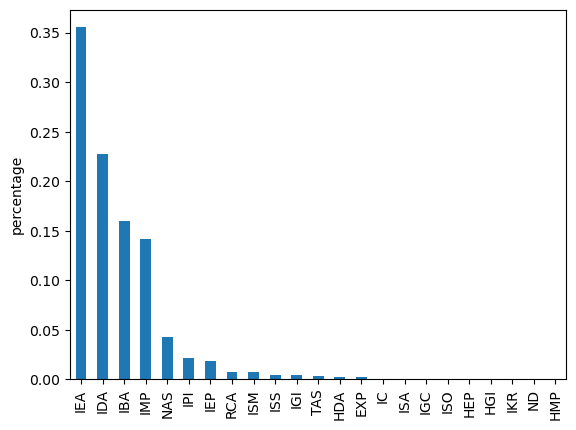

In [88]:
# filter/analyze evidence codes
g = go_annotations_ecoli.evidence_code.value_counts(normalize=True).plot.bar()
g.set_ylabel("percentage")


In [89]:
go_annotations_ecoli = (
    go_annotations_ecoli[go_annotations_ecoli.evidence_code != "IEA"]
    .drop("evidence_code", axis=1)
    .drop_duplicates()
    .reset_index(drop=True)
)
go_annotations_ecoli


,Uniprot,qualifier,aspect,go_id
0,A5A615,located_in,C,GO:0005886
1,A5A615,located_in,C,GO:0005575
2,A5A615,located_in,C,GO:0016020
3,A5A615,located_in,C,GO:0110165
4,A5A616,acts_upstream_of_or_within,P,GO:0009991
...,...,...,...,...
138480,Q93K97,is_active_in,C,GO:0005829
138481,Q93K97,is_active_in,C,GO:0110165
138482,Q93K97,located_in,C,GO:0005575
138483,Q93K97,located_in,C,GO:0005829


In [90]:
go_annotations_ecoli = go_annotations_ecoli[
    ~go_annotations_ecoli.qualifier.str.startswith("NOT")
].reset_index(drop=True)
go_annotations_ecoli


,Uniprot,qualifier,aspect,go_id
0,A5A615,located_in,C,GO:0005886
1,A5A615,located_in,C,GO:0005575
2,A5A615,located_in,C,GO:0016020
3,A5A615,located_in,C,GO:0110165
4,A5A616,acts_upstream_of_or_within,P,GO:0009991
...,...,...,...,...
138361,Q93K97,is_active_in,C,GO:0005829
138362,Q93K97,is_active_in,C,GO:0110165
138363,Q93K97,located_in,C,GO:0005575
138364,Q93K97,located_in,C,GO:0005829


What qualifiers are assigned to the individual aspects?

- Looks good, we can filter later

In [91]:
for aspect in ["C", "P", "F"]:
    print("###", aspect)
    print(
        go_annotations_ecoli[go_annotations_ecoli.aspect == aspect]
        .qualifier.astype("str")
        .value_counts()
        .to_string()
    )

### C
located_in          11217
is_active_in         3364
part_of              2683
colocalizes_with        7
### P
acts_upstream_of_or_within    49569
involved_in                   41647
acts_upstream_of                  8
### F
enables           29318
contributes_to      553


Here, we remove some of the less common and less accurate qualifiers. This did not seem to have a major impact on the final results and conclusions.

In [92]:
go_annotations_ecoli = go_annotations_ecoli[~go_annotations_ecoli.qualifier.isin(["contributes_to", "colocalizes_with", "acts_upstream_of"])]
go_annotations_ecoli.qualifier.value_counts()

acts_upstream_of_or_within                        49569
involved_in                                       41647
enables                                           29318
located_in                                        11217
is_active_in                                       3364
part_of                                            2683
acts_upstream_of_positive_effect                      0
NOT|acts_upstream_of                                  0
NOT|acts_upstream_of_or_within_negative_effect        0
acts_upstream_of_or_within_negative_effect            0
acts_upstream_of_negative_effect                      0
NOT|part_of                                           0
NOT|contributes_to                                    0
NOT|colocalizes_with                                  0
acts_upstream_of                                      0
acts_upstream_of_or_within_positive_effect            0
NOT|acts_upstream_of_or_within                        0
NOT|enables                                     

Annotating the dataset with labels of GO terms:

In [93]:
go_annotations_ecoli = go_annotations_ecoli.assign(
    go_term=go_annotations_ecoli.go_id.map(go_owl.get_label)
)
go_annotations_ecoli

,Uniprot,qualifier,aspect,go_id,go_term
0,A5A615,located_in,C,GO:0005886,plasma membrane
1,A5A615,located_in,C,GO:0005575,cellular_component
2,A5A615,located_in,C,GO:0016020,membrane
3,A5A615,located_in,C,GO:0110165,cellular anatomical entity
4,A5A616,acts_upstream_of_or_within,P,GO:0009991,response to extracellular stimulus
...,...,...,...,...,...
138361,Q93K97,is_active_in,C,GO:0005829,cytosol
138362,Q93K97,is_active_in,C,GO:0110165,cellular anatomical entity
138363,Q93K97,located_in,C,GO:0005575,cellular_component
138364,Q93K97,located_in,C,GO:0005829,cytosol


### Keywords

In [94]:
keywords_uniprot = load_df("keywords")
keywords_ecoli = (
    keywords_uniprot[keywords_uniprot.Uniprot.isin(sequences_all.index)]
    .drop_duplicates()
    .reset_index(drop=True)
)
keywords_ecoli

,Uniprot,keyword
0,P00509,3D-structure
1,P00509,Aminotransferase
2,P00509,Cytoplasm
3,P00509,Direct protein sequencing
4,P00509,Pyridoxal phosphate
...,...,...
23130,P0AEG8,Reference proteome
23131,P33668,Reference proteome
23132,P33668,Signal
23133,A0A0A6YVN8,3D-structure


### Interpro

In [95]:
interpro_all = load_df("interpro")
interpro_ecoli = interpro_all[
    interpro_all.Uniprot.isin(sequences_all.index)
].reset_index(drop=True)
interpro_ecoli


,Uniprot,interpro_id
0,P00509,IPR004839
1,P00509,IPR000796
2,P00509,IPR004838
3,P00509,IPR015424
4,P00509,IPR015421
...,...,...
12755,P77296,IPR011990
12756,P0AEG8,IPR019717
12757,P33668,IPR028921
12758,A0A0A6YVN8,IPR036237


### TCDB

In [96]:
tcdb_all = load_df("tcdb_substrates")
tcdb_ecoli = (
    tcdb_all[
        (tcdb_all.variable == "Uniprot") & (tcdb_all.value.isin(sequences_all.index))
    ]
    .drop_duplicates()
    .reset_index(drop=True)
    .drop("variable", axis=1)
    .rename(columns={"value": "Uniprot"})[["Uniprot", "tcdb_id"]]
)
tcdb_ecoli


,Uniprot,tcdb_id
0,P00803,9.B.391.1.3
1,P02916,3.A.1.1.1
2,P02925,3.A.1.2.1
3,P02929,2.C.1.1.1
4,P03959,3.A.3.7.1
...,...,...
702,Q46909,2.A.1.1.95
703,P28303,2.A.66.1.4
704,C1P611,1.C.135.1.1
705,P23481,3.D.1.9.1


## Clustering analysis

- Use KMeans etc. to cluster feature data
- Find GO terms etc. that match clusters most closely.

In [97]:
sequences

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
Uniprot,,,,,,
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
P03959,kdpA b0698 JW0686,Potassium-transporting ATPase potassium-bindin...,True,1,MAAQGFLLIATFLLVLMVLARPLGSGLARLINDIPLPGTTGVERVL...,83333
P05825,fepA fep feuB b0584 JW5086,Ferrienterobactin receptor (Enterobactin outer...,True,1,MNKKIHSLALLVNLGIYGVAQAQEPTDTPVSHDDTIVVTAAEQNLQ...,83333
P0AA78,exuT b3093 JW3064,Hexuronate transporter (Aldohexuronate transpo...,True,1,MRKIKGLRWYMIALVTLGTVLGYLTRNTVAAAAPTLMEELNISTQQ...,83333
P0AAD6,sdaC dcrA b2796 JW2767,Serine transporter SdaC (H(+)/L-serine symport...,True,1,METTQTSTIASKDSRSAWRKTDTMWMLGLYGTAIGAGVLFLPINAG...,83333
...,...,...,...,...,...,...
P77328,ybbY glxB4 b0513 JW0501,Putative purine permease YbbY,True,1,MFNFAVSRESLLSGFQWFFFIFCNTVVVPPTLLSAFQLPQSSLLTL...,83333
P76198,ydiN b1691 JW5274,Inner membrane transport protein YdiN,True,1,MSQNKAFSTPFILAVLCIYFSYFLHGISVITLAQNMSSLAEKFSTD...,83333
P33011,yeeA b2008 JW1990,Inner membrane protein YeeA,True,1,MRADKSLSPFEIRVYRHYRIVHGTRVALAFLLTFLIIRLFTIPEST...,83333


### Kmeans

#### What is the optimal number *k* of clusters?

In [98]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score,
)

def cluster_plots(feature_data, min_clusters: int = 2, max_clusters: int = 20):
    """
    Feature_data is a pandas dataframe with features as columns and samples as rows.  
    - Elbow plot/Inertia: the more it looks like an elbow, the better. the optimal number of clusters is at the "joint of the arm"
    - Silhouette: Number between -1 and 1. The higher the better. Measures tightness/overlap of clusters
    - CH: Higher score is better
    - DB: The closer to 0 the better. Average similarity between any cluster and its closest cluster.
    """
    scores = list()

    for n_clusters in range(min_clusters, max_clusters + 1):
        pipe = make_pipeline(
            StandardScaler(), KMeans(n_clusters=n_clusters, random_state=0)
        )
        pipe.fit(feature_data)
        scores.append([n_clusters, "Inertia", pipe["kmeans"].inertia_])
        scores.append(
            [
                n_clusters,
                "Silhouette Coefficient",
                silhouette_score(feature_data, pipe["kmeans"].labels_),
            ]
        )
        scores.append(
            [
                n_clusters,
                "Calinski Harabasz Index",
                calinski_harabasz_score(feature_data, pipe["kmeans"].labels_),
            ]
        )
        scores.append(
            [
                n_clusters,
                "Davies Bouldin Index",
                davies_bouldin_score(feature_data, pipe["kmeans"].labels_),
            ]
        )

    scores_wide = pd.DataFrame.from_records(scores, columns=["k", "metric", "score"]).pivot(
        index="k", columns="metric", values="score"
    )
    return scores_wide.plot(subplots=True, layout=(2,2), figsize=(15,10), xticks=scores_wide.index)

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

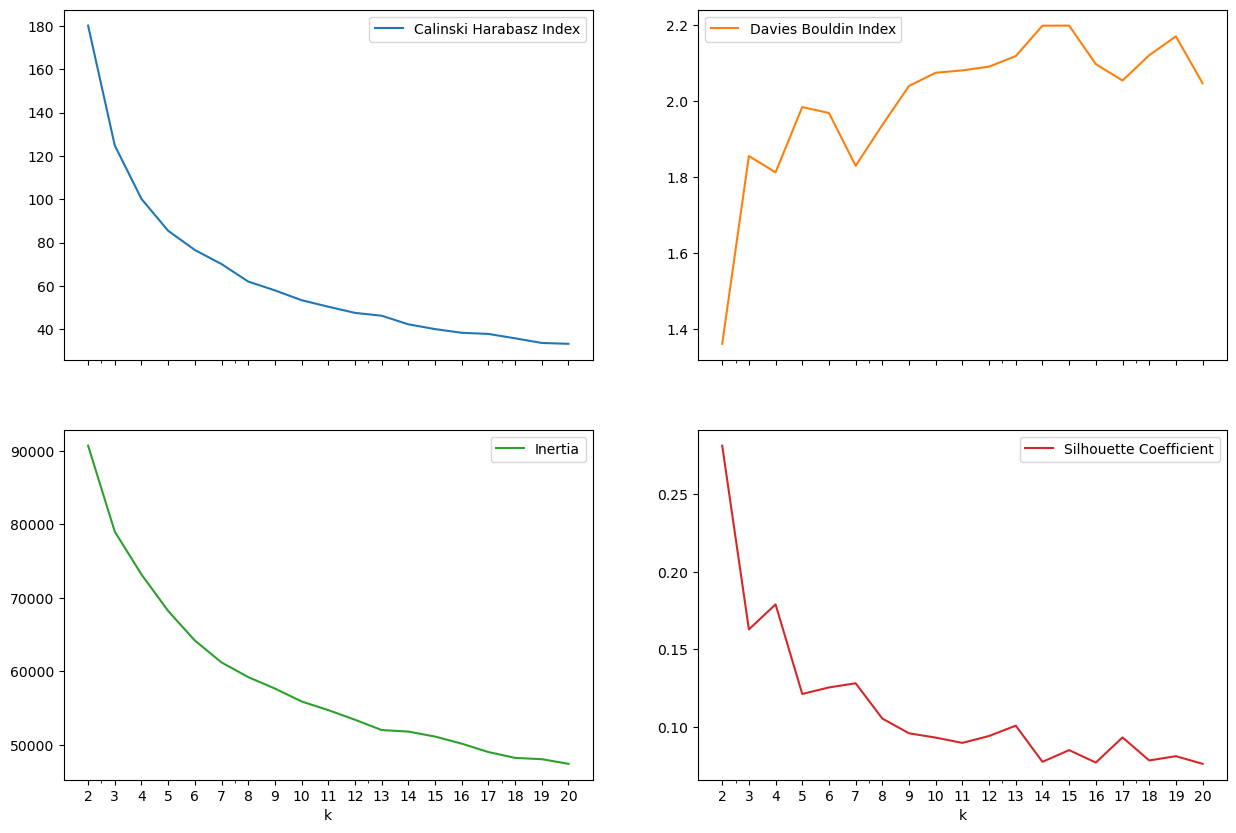

In [99]:
cluster_plots(feature_pssm)

array([[<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>],
       [<AxesSubplot:xlabel='k'>, <AxesSubplot:xlabel='k'>]], dtype=object)

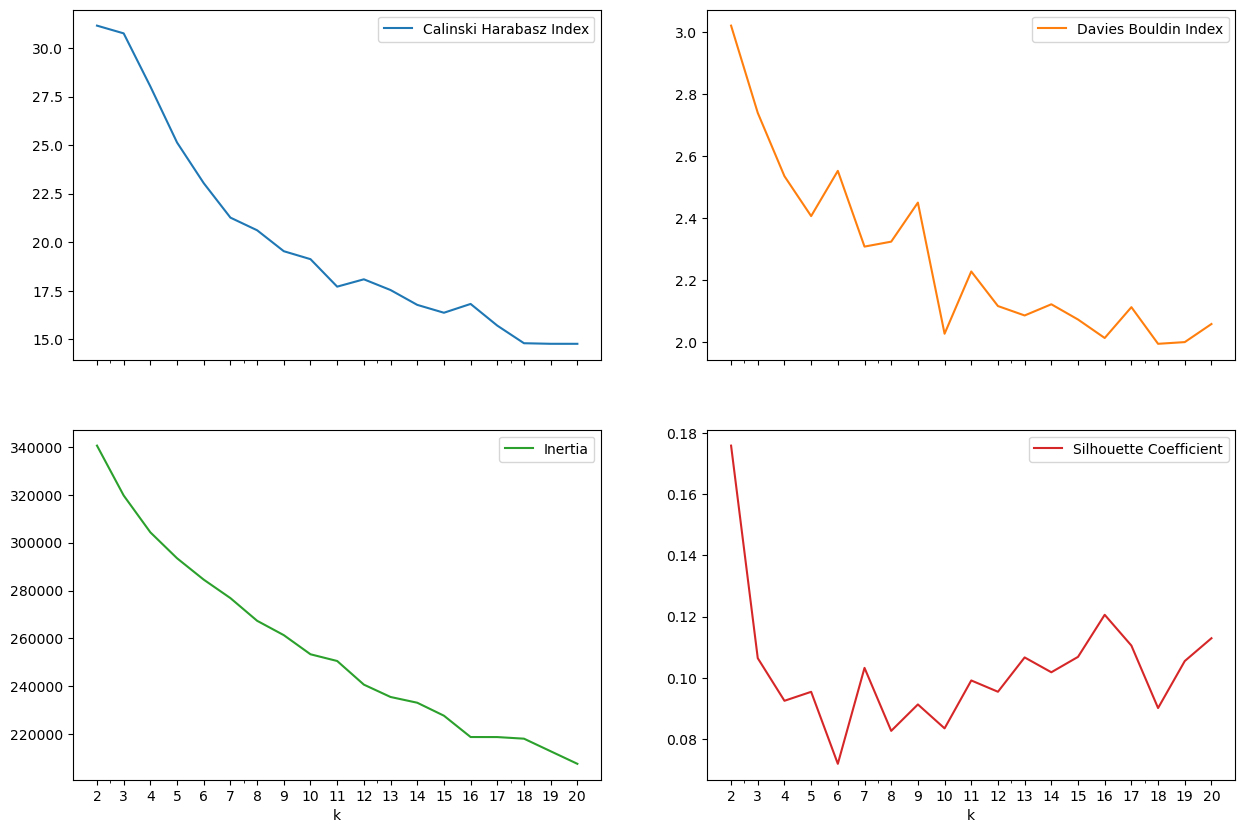

In [100]:
cluster_plots(feature_protnlm)

It actually looks like PSSM works better! But none of the metrics look particularly good, we should look at a dendrogram.

### Hierarchical clustering using PSSMs

We will try hierarchical clustering first in order to find good annotations to create clusters, then try KMeans again. The clustering looks better when using PSSM instead of embeddings.

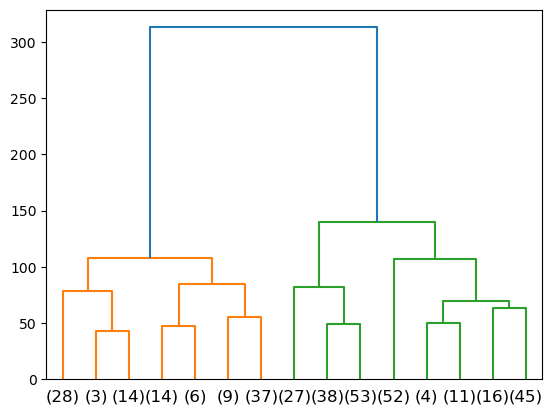

In [101]:
from scipy.cluster import hierarchy
from sklearn.preprocessing import scale

linkage = hierarchy.linkage(scale(feature_pssm), method="ward", metric="euclidean")
dendrogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=15)


#### Analyzing the two clusters

It seems like there are two very obvious clusters. What are they?

In [114]:
labels_level0 = hierarchy.fcluster(linkage, criterion="maxclust", t=2)
labels_level0 = pd.Series(data=labels_level0, index=feature_pssm.index)
labels_level0

P02916    2
P03959    2
P05825    1
P0AA78    2
P0AAD6    2
         ..
P77328    2
P76198    2
P33011    2
P37327    2
P39282    2
Length: 357, dtype: int32

In [115]:
labels_level0.value_counts()

2    246
1    111
dtype: int64

111 246


#### Enrichment analysis

In [105]:
from scipy.stats import hypergeom, rankdata
import numpy as np


# Takes a protein set a sub-set and calculates p value and fold change.
def enrichment_analysis(
    proteins_reference: set,
    proteins_subset: set,
    annotations: list,
    p_cutoff: float = None,
    min_lfc: float = None,
) -> pd.DataFrame:
    assert len(proteins_reference) > 0 and len(proteins_subset) > 0, "set was empty"
    assert all(
        protein in proteins_reference for protein in proteins_subset
    ), "a protein in the subset was not in the reference set."

    annotations_df = pd.DataFrame.from_records(
        annotations, columns=["identifier", "annotation"]
    )
    annotations_reference = annotations_df[
        annotations_df.identifier.isin(proteins_reference)
    ]
    annotations_subset = annotations_df[annotations_df.identifier.isin(proteins_subset)]

    annotation_scores = []
    for annotation in annotations_subset.annotation.unique():
        total_reference = len(proteins_reference)
        annotated_reference = (
            annotations_reference[annotations_reference.annotation == annotation]
            .identifier.unique()
            .shape[0]
        )
        total_subset = len(proteins_subset)
        annotated_subset = (
            annotations_subset[annotations_subset.annotation == annotation]
            .identifier.unique()
            .shape[0]
        )
        expected = (annotated_reference / total_reference) * total_subset
        fold_change = np.log2(annotated_subset / expected)

        # Scipy naming convention, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.hypergeom.html
        # Normal convention: N, K, n, k
        # M proteins in the reference set (i.e. genome)
        M = total_reference
        # n of those are annotated with the annotation
        n = annotated_reference
        # we draw N proteins from M
        N = total_subset
        # k of those are annotated with the annotation
        k = annotated_subset
        # The cumulative distribution function (cdf) gives the probability of drawing k or fewer than k annotated proteins.
        # The cdf is the sum of the probability mass function for all values <=k.
        # The survival function sf is defined 1-cdf and is therefore the probability of getting more than k values.
        # Since we want the probability for k or more values, we have to calculate the sf at k-1.
        p_val = hypergeom.sf(k - 1, M, n, N)

        annotation_scores.append(
            [
                annotation,
                total_reference,
                annotated_reference,
                total_subset,
                annotated_subset,
                expected,
                fold_change,
                p_val,
            ]
        )
    annotation_scores = pd.DataFrame.from_records(
        annotation_scores,
        columns=[
            "annotation",
            "total_reference",
            "annotated_reference",
            "total_subset",
            "annotated_subset",
            "expected",
            "lfc",
            "p",
        ],
    )

    annotation_scores["p_fdr"] = (
        annotation_scores.p * len(annotation_scores.p) / rankdata(annotation_scores.p)
    )
    annotation_scores.p_fdr = annotation_scores.p_fdr.clip(upper=1.0)
    # p_fdr[p_fdr > 1] = 1.0
    #  = p_fdr

    annotation_scores["p_bonferroni"] = annotation_scores.p.transform(
        lambda p: min(p * annotation_scores.shape[0], 1.0)
    )
    annotation_scores = annotation_scores.sort_values(["p", "lfc"])

    if p_cutoff:
        annotation_scores = annotation_scores[annotation_scores.p_fdr <= p_cutoff]

    if min_lfc:
        annotation_scores = annotation_scores[annotation_scores.lfc >= min_lfc]

    return annotation_scores


##### Creating annotation datasets for enrichment analysis

In [106]:
keywords = list(keywords_ecoli.to_records(index=False))
tmp = go_annotations_ecoli.drop("qualifier", axis=1).melt(
    id_vars=["Uniprot", "aspect"], value_vars=["go_id", "go_term"]
)
tmp = tmp[tmp.variable == "go_term"].drop_duplicates().reset_index(drop=True)
go_mf = (
    tmp[tmp.aspect == "F"]
    .drop(["aspect","variable"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
go_bp = (
    tmp[tmp.aspect == "P"]
    .drop(["aspect","variable"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
go_cc = (
    tmp[tmp.aspect == "C"]
    .drop(["aspect","variable"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
go_all = (
    tmp
    .drop(["aspect","variable"], axis=1)
    .drop_duplicates()
    .to_records(index=False)
    .tolist()
)
del tmp
go_mf


[('A5A627', 'anion channel activity'),
 ('A5A627', 'channel activity'),
 ('A5A627', 'ion transmembrane transporter activity'),
 ('A5A627', 'anion transmembrane transporter activity'),
 ('A5A627', 'inorganic anion transmembrane transporter activity'),
 ('A5A627', 'molecular_function'),
 ('A5A627', 'ion channel activity'),
 ('A5A627', 'transmembrane transporter activity'),
 ('A5A627', 'transporter activity'),
 ('A5A627', 'inorganic molecular entity transmembrane transporter activity'),
 ('A5A627', 'passive transmembrane transporter activity'),
 ('C1P5Z7', 'molecular function inhibitor activity'),
 ('C1P5Z7', 'molecular function regulator activity'),
 ('C1P5Z7', 'molecular_function'),
 ('C1P5Z7', 'enzyme regulator activity'),
 ('C1P5Z7', 'enzyme inhibitor activity'),
 ('O32583', 'molecular_function'),
 ('O32583', 'molecular carrier activity'),
 ('O32583', 'sulfur carrier activity'),
 ('P00350', 'molecular_function'),
 ('P00350', 'oxidoreductase activity, acting on CH-OH group of donors'),

##### Enrichment analysis

{'cluster1': {'A5A627',
  'P00393',
  'P00550',
  'P02930',
  'P03960',
  'P04983',
  'P05825',
  'P06971',
  'P06996',
  'P07109',
  'P08194',
  'P08722',
  'P09323',
  'P0A6E6',
  'P0A712',
  'P0A742',
  'P0A910',
  'P0A927',
  'P0A9R7',
  'P0AA76',
  'P0AAE0',
  'P0AAE2',
  'P0AAG0',
  'P0AAG8',
  'P0AAH0',
  'P0AAH4',
  'P0AAT4',
  'P0AAW9',
  'P0ABB4',
  'P0ABI8',
  'P0ABJ1',
  'P0ABJ6',
  'P0AC23',
  'P0AC98',
  'P0AE26',
  'P0AEM9',
  'P0AER0',
  'P0AEX7',
  'P0AF06',
  'P0AFC3',
  'P0AFC7',
  'P0AFY6',
  'P0AG99',
  'P0AGF4',
  'P0C0S1',
  'P10384',
  'P10408',
  'P10903',
  'P10907',
  'P14175',
  'P15993',
  'P16869',
  'P17315',
  'P19642',
  'P22731',
  'P23200',
  'P23843',
  'P23847',
  'P25737',
  'P27125',
  'P30130',
  'P30750',
  'P31224',
  'P31466',
  'P32716',
  'P33129',
  'P33341',
  'P33590',
  'P33599',
  'P33913',
  'P36937',
  'P37313',
  'P37329',
  'P37636',
  'P37772',
  'P37774',
  'P39301',
  'P39352',
  'P42915',
  'P56580',
  'P60844',
  'P68187',
  'P

In [120]:
def analyze_clusters(labels:pd.Series, annotations_dict:dict={"go_all":go_all,"cc": go_cc, "mf":go_mf, "bp":go_bp, "keywords": keywords}):
    labels_dict = {f"cluster{i}": set(labels[labels == i].index.tolist()) for i in sorted(labels.unique())}

    for cluster_name, cluster_set in labels_dict.items():
        print("="*20)
        print(cluster_name)
        print("="*20)
        for dataset_name, go_dataset in annotations_dict.items():
            print(f"Annotation: {dataset_name}")
            res = enrichment_analysis(
                proteins_reference=set(sequences.index.unique().to_list()),
                # proteins_reference=set(sequences_all.index.unique().to_list()),
                proteins_subset=cluster_set,
                annotations=go_dataset,
                p_cutoff=0.05,
                # min_lfc=1
            )
            display(res)
            print(res.shape)

# protein sets (accessions)
analyze_clusters(labels_level0)

cluster1
Annotation: go_all


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
134,cell outer membrane,357,27,111,23,8.394958,1.454039,2.078635e-09,0.000001,0.000002
135,outer membrane,357,27,111,23,8.394958,1.454039,2.078635e-09,0.000001,0.000002
62,binding,357,119,111,59,37.000000,0.673190,1.321832e-07,0.000037,0.000112
136,periplasmic space,357,16,111,14,4.974790,1.492719,2.822946e-06,0.000531,0.002391
137,outer membrane-bounded periplasmic space,357,16,111,14,4.974790,1.492719,2.822946e-06,0.000531,0.002391
122,wide pore channel activity,357,19,111,15,5.907563,1.344327,1.399789e-05,0.001824,0.011856
123,porin activity,357,19,111,15,5.907563,1.344327,1.399789e-05,0.001824,0.011856
16,channel activity,357,44,111,26,13.680672,0.926372,3.727963e-05,0.003715,0.031576
25,passive transmembrane transporter activity,357,44,111,26,13.680672,0.926372,3.727963e-05,0.003715,0.031576
115,protein binding,357,77,111,38,23.941176,0.666505,1.158074e-04,0.009809,0.098089


(24, 10)
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
9,cell outer membrane,357,27,111,23,8.394958,1.454039,2.078635e-09,9.145993e-08,1.371899e-07
10,outer membrane,357,27,111,23,8.394958,1.454039,2.078635e-09,9.145993e-08,1.371899e-07
11,periplasmic space,357,16,111,14,4.974790,1.492719,2.822946e-06,5.323269e-05,1.863144e-04
12,outer membrane-bounded periplasmic space,357,16,111,14,4.974790,1.492719,2.822946e-06,5.323269e-05,1.863144e-04
4,protein-containing complex,357,155,111,63,48.193277,0.386520,4.930142e-04,6.507788e-03,3.253894e-02
6,membrane protein complex,357,147,111,60,45.705882,0.392583,7.039776e-04,7.743754e-03,4.646252e-02


(6, 10)
Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
25,binding,357,119,111,59,37.000000,0.673190,1.321832e-07,0.000037,0.000037
45,wide pore channel activity,357,19,111,15,5.907563,1.344327,1.399789e-05,0.001579,0.003947
46,porin activity,357,19,111,15,5.907563,1.344327,1.399789e-05,0.001579,0.003947
1,channel activity,357,44,111,26,13.680672,0.926372,3.727963e-05,0.002336,0.010513
10,passive transmembrane transporter activity,357,44,111,26,13.680672,0.926372,3.727963e-05,0.002336,0.010513
38,protein binding,357,77,111,38,23.941176,0.666505,1.158074e-04,0.005443,0.032658
48,identical protein binding,357,27,111,17,8.394958,1.017940,3.837330e-04,0.015459,0.108213
76,siderophore uptake transmembrane transporter a...,357,6,111,6,1.865546,1.685364,8.214637e-04,0.027253,0.231653
228,fimbrial usher porin activity,357,6,111,6,1.865546,1.685364,8.214637e-04,0.027253,0.231653
27,organic cyclic compound binding,357,38,111,21,11.815126,0.829754,9.280026e-04,0.024923,0.261697


(13, 10)
Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni


(0, 10)
Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
8,Signal,357,46,111,38,14.302521,1.409730,1.026404e-14,9.853483e-13,9.853483e-13
16,Direct protein sequencing,357,55,111,37,17.100840,1.113458,1.681339e-09,8.070427e-08,1.614085e-07
1,Cell outer membrane,357,27,111,23,8.394958,1.454039,2.078635e-09,5.701398e-08,1.995489e-07
11,Transmembrane beta strand,357,27,111,23,8.394958,1.454039,2.078635e-09,5.701398e-08,1.995489e-07
0,3D-structure,357,116,111,58,36.067227,0.685364,1.242733e-07,2.386048e-06,1.193024e-05
56,Periplasm,357,10,111,9,3.109244,1.533361,1.586527e-04,2.343179e-03,1.523066e-02
60,Disulfide bond,357,10,111,9,3.109244,1.533361,1.586527e-04,2.343179e-03,1.523066e-02
9,TonB box,357,6,111,6,1.865546,1.685364,8.214637e-04,9.277707e-03,7.886051e-02
94,Fimbrium biogenesis,357,6,111,6,1.865546,1.685364,8.214637e-04,9.277707e-03,7.886051e-02
19,Translocase,357,37,111,20,11.504202,0.797839,1.844908e-03,1.771112e-02,1.771112e-01


(12, 10)
cluster2
Annotation: go_all


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
46,plasma membrane,357,285,246,222,196.386555,0.176864,2.190972e-12,2.475798e-09,2.475798e-09
70,secondary active transmembrane transporter act...,357,88,246,76,60.638655,0.325762,1.744881e-05,9.858577e-03,1.971715e-02


(2, 10)
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
0,plasma membrane,357,285,246,222,196.386555,0.176864,2.190972e-12,1.424132e-10,1.424132e-10
2,membrane,357,316,246,228,217.747899,0.066375,3.653903e-04,1.187518e-02,2.375037e-02


(2, 10)
Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
27,secondary active transmembrane transporter act...,357,88,246,76,60.638655,0.325762,0.000017,0.006927,0.006927


(1, 10)
Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni


(0, 10)
Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
7,Transmembrane helix,357,268,246,215,184.672269,0.219369,7.861795e-15,8.883828e-13,8.883828e-13
2,Cell membrane,357,304,246,228,209.478992,0.122228,1.236558e-08,6.986555e-07,1.397311e-06
1,Cell inner membrane,357,302,246,226,208.100840,0.119040,5.559409e-08,2.094044e-06,6.282133e-06
6,Transmembrane,357,295,246,219,203.277311,0.107482,4.322393e-06,1.221076e-04,4.884304e-04
14,Symport,357,51,246,45,35.142857,0.356694,5.692928e-04,1.286602e-02,6.433009e-02
29,Antiport,357,19,246,19,13.092437,0.537266,6.745755e-04,1.270451e-02,7.622703e-02


(6, 10)


#### Subclusters

In [48]:
pssm_label1 = feature_pssm.loc[labels_level0[labels_level0 == 1].index.tolist()]
pssm_label2 = feature_pssm.loc[labels_level0[labels_level0 == 2].index.tolist()]

In [109]:
# TODO re-use existing linkage?
linkage.shape

(356, 4)

In [125]:
def printfirst(s):
    print(s[0])
foo = "bar",
printfirst(foo)


bar


##### Subclusters of left cluster

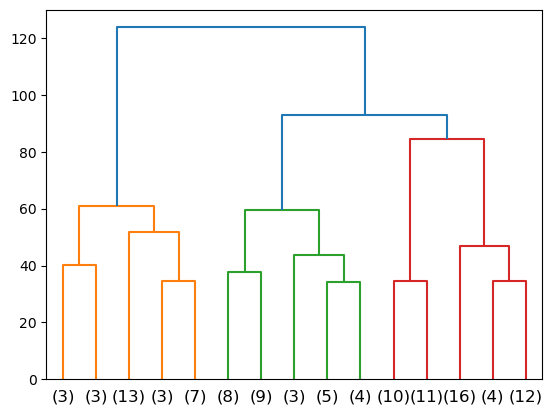

In [49]:
linkage = hierarchy.linkage(scale(pssm_label1), method="ward")
dendrogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=15)

In [121]:
sublabels = hierarchy.fcluster(linkage, criterion="maxclust", t=3)
sublabels = pd.Series(data=sublabels, index=pssm_label1.index)
analyze_clusters(sublabels)

cluster1
Annotation: go_all


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
177,generation of precursor metabolites and energy,357,14,29,7,1.137255,2.621799,0.000026,0.009814,0.009814
186,respiratory electron transport chain,357,11,29,6,0.893557,2.747330,0.000060,0.004992,0.022466
187,electron transport chain,357,11,29,6,0.893557,2.747330,0.000060,0.004992,0.022466
193,oxidoreductase activity,357,11,29,6,0.893557,2.747330,0.000060,0.004992,0.022466
194,electron transfer activity,357,11,29,6,0.893557,2.747330,0.000060,0.004992,0.022466
197,oxidoreduction-driven active transmembrane tra...,357,11,29,6,0.893557,2.747330,0.000060,0.004992,0.022466
206,oxidoreductase complex,357,11,29,6,0.893557,2.747330,0.000060,0.004992,0.022466
209,catalytic complex,357,12,29,6,0.974790,2.621799,0.000112,0.005299,0.042393
175,energy derivation by oxidation of organic comp...,357,10,29,5,0.812325,2.621799,0.000475,0.019907,0.179166
178,electron transport coupled proton transport,357,6,29,4,0.487395,3.036837,0.000476,0.017105,0.179605


(17, 10)
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
14,oxidoreductase complex,357,11,29,6,0.893557,2.747330,0.000060,0.002026,0.002026
17,catalytic complex,357,12,29,6,0.974790,2.621799,0.000112,0.001912,0.003823
12,cytochrome o ubiquinol oxidase complex,357,4,29,3,0.324930,3.206762,0.001837,0.017842,0.062446
15,cytochrome complex,357,4,29,3,0.324930,3.206762,0.001837,0.017842,0.062446
20,respiratory chain complex I,357,6,29,3,0.487395,2.621799,0.008202,0.046477,0.278862
21,respiratory chain complex,357,6,29,3,0.487395,2.621799,0.008202,0.046477,0.278862
24,plasma membrane respiratory chain complex I,357,6,29,3,0.487395,2.621799,0.008202,0.046477,0.278862


(7, 10)
Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
57,oxidoreductase activity,357,11,29,6,0.893557,2.74733,0.00006,0.003844,0.007687
58,electron transfer activity,357,11,29,6,0.893557,2.74733,0.00006,0.003844,0.007687
61,oxidoreduction-driven active transmembrane tra...,357,11,29,6,0.893557,2.74733,0.00006,0.003844,0.007687


(3, 10)
Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
113,generation of precursor metabolites and energy,357,14,29,7,1.137255,2.621799,0.000026,0.005571,0.005571
122,respiratory electron transport chain,357,11,29,6,0.893557,2.747330,0.000060,0.005101,0.012753
123,electron transport chain,357,11,29,6,0.893557,2.747330,0.000060,0.005101,0.012753
111,energy derivation by oxidation of organic comp...,357,10,29,5,0.812325,2.621799,0.000475,0.025425,0.101702
114,electron transport coupled proton transport,357,6,29,4,0.487395,3.036837,0.000476,0.018537,0.101951
118,"energy coupled proton transmembrane transport,...",357,6,29,4,0.487395,3.036837,0.000476,0.018537,0.101951
110,cellular respiration,357,7,29,4,0.568627,2.814444,0.001049,0.029922,0.224413
112,aerobic respiration,357,7,29,4,0.568627,2.814444,0.001049,0.029922,0.224413


(8, 10)
Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
0,3D-structure,357,116,29,19,9.422969,1.011746,0.000146,0.008627,0.008627
11,Direct protein sequencing,357,55,29,12,4.467787,1.425402,0.000372,0.010969,0.021939


(2, 10)
cluster2
Annotation: go_all


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
59,cell outer membrane,357,27,29,19,2.193277,3.114839,2.208676e-18,4.078689e-16,6.118033e-16
60,outer membrane,357,27,29,19,2.193277,3.114839,2.208676e-18,4.078689e-16,6.118033e-16
44,wide pore channel activity,357,19,29,12,1.543417,2.958834,2.537305e-10,2.008096e-08,7.028335e-08
45,porin activity,357,19,29,12,1.543417,2.958834,2.537305e-10,2.008096e-08,7.028335e-08
63,periplasmic space,357,16,29,11,1.299720,3.081231,4.592995e-10,2.313199e-08,1.272260e-07
64,outer membrane-bounded periplasmic space,357,16,29,11,1.299720,3.081231,4.592995e-10,2.313199e-08,1.272260e-07
98,siderophore uptake transmembrane transporter a...,357,6,29,6,0.487395,3.621799,1.723365e-07,5.024969e-06,4.773720e-05
212,pilus organization,357,6,29,6,0.487395,3.621799,1.723365e-07,5.024969e-06,4.773720e-05
213,pilus assembly,357,6,29,6,0.487395,3.621799,1.723365e-07,5.024969e-06,4.773720e-05
215,cell projection organization,357,6,29,6,0.487395,3.621799,1.723365e-07,5.024969e-06,4.773720e-05


(40, 10)
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
1,cell outer membrane,357,27,29,19,2.193277,3.114839,2.208676e-18,3.239392e-17,4.859088e-17
2,outer membrane,357,27,29,19,2.193277,3.114839,2.208676e-18,3.239392e-17,4.859088e-17
5,periplasmic space,357,16,29,11,1.299720,3.081231,4.592995e-10,2.887025e-09,1.010459e-08
6,outer membrane-bounded periplasmic space,357,16,29,11,1.299720,3.081231,4.592995e-10,2.887025e-09,1.010459e-08


(4, 10)
Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
16,wide pore channel activity,357,19,29,12,1.543417,2.958834,2.537305e-10,1.370145e-08,2.055217e-08
17,porin activity,357,19,29,12,1.543417,2.958834,2.537305e-10,1.370145e-08,2.055217e-08
21,siderophore uptake transmembrane transporter a...,357,6,29,6,0.487395,3.621799,1.723365e-07,3.988358e-06,1.395925e-05
71,fimbrial usher porin activity,357,6,29,6,0.487395,3.621799,1.723365e-07,3.988358e-06,1.395925e-05
0,channel activity,357,44,29,13,3.574230,1.862807,4.311543e-06,6.349727e-05,3.492350e-04
7,passive transmembrane transporter activity,357,44,29,13,3.574230,1.862807,4.311543e-06,6.349727e-05,3.492350e-04
20,siderophore-iron transmembrane transporter act...,357,10,29,6,0.812325,2.884834,2.870709e-05,3.321820e-04,2.325274e-03
26,peptide transmembrane transporter activity,357,33,29,10,2.680672,1.899333,6.817067e-05,6.902281e-04,5.521824e-03
29,amide transmembrane transporter activity,357,35,29,10,2.843137,1.814444,1.214088e-04,1.092679e-03,9.834115e-03
62,peptide binding,357,4,29,3,0.324930,3.206762,1.836649e-03,1.416843e-02,1.487685e-01


(13, 10)
Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
119,pilus organization,357,6,29,6,0.487395,3.621799,1.723365e-07,0.000012,0.000030
120,pilus assembly,357,6,29,6,0.487395,3.621799,1.723365e-07,0.000012,0.000030
122,cell projection organization,357,6,29,6,0.487395,3.621799,1.723365e-07,0.000012,0.000030
125,cell projection assembly,357,6,29,6,0.487395,3.621799,1.723365e-07,0.000012,0.000030
123,cellular component assembly,357,10,29,7,0.812325,3.107226,1.143282e-06,0.000040,0.000199
20,siderophore transport,357,5,29,5,0.406162,3.621799,2.527602e-06,0.000073,0.000440
121,cellular component organization or biogenesis,357,15,29,7,1.218487,2.522264,4.609789e-05,0.001069,0.008021
124,cellular component organization,357,15,29,7,1.218487,2.522264,4.609789e-05,0.001069,0.008021
62,peptide transport,357,35,29,10,2.843137,1.814444,1.214088e-04,0.002347,0.021125
25,iron coordination entity transport,357,18,29,7,1.462185,2.259229,1.919189e-04,0.003339,0.033394


(18, 10)
Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
8,Signal,357,46,29,29,3.736695,2.956218,4.674342e-31,1.636020e-29,1.636020e-29
1,Cell outer membrane,357,27,29,20,2.193277,3.188840,2.743552e-20,3.840973e-19,9.602433e-19
11,Transmembrane beta strand,357,27,29,20,2.193277,3.188840,2.743552e-20,3.840973e-19,9.602433e-19
17,Disulfide bond,357,10,29,9,0.812325,3.469796,4.050243e-10,3.543963e-09,1.417585e-08
15,Periplasm,357,10,29,8,0.812325,3.299871,2.861365e-08,2.002956e-07,1.001478e-06
9,TonB box,357,6,29,6,0.487395,3.621799,1.723365e-07,9.279656e-07,6.031776e-06
34,Fimbrium biogenesis,357,6,29,6,0.487395,3.621799,1.723365e-07,9.279656e-07,6.031776e-06
6,Receptor,357,7,29,6,0.568627,3.399407,1.138599e-06,4.981371e-06,3.985097e-05
14,Direct protein sequencing,357,55,29,14,4.467787,1.647794,1.150186e-05,4.472947e-05,4.025652e-04
0,3D-structure,357,116,29,20,9.422969,1.085746,2.944458e-05,1.030560e-04,1.030560e-03


(13, 10)
cluster3
Annotation: go_all


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
43,anion binding,357,37,53,18,5.492997,1.712331,1.719642e-07,0.000110,0.000110
35,nucleotide binding,357,34,53,17,5.047619,1.751860,2.553117e-07,0.000065,0.000163
42,nucleoside phosphate binding,357,34,53,17,5.047619,1.751860,2.553117e-07,0.000065,0.000163
38,ion binding,357,47,53,20,6.977591,1.519199,4.719783e-07,0.000075,0.000302
92,ATP binding,357,32,53,16,4.750700,1.751860,6.515203e-07,0.000069,0.000416
94,adenyl nucleotide binding,357,32,53,16,4.750700,1.751860,6.515203e-07,0.000069,0.000416
99,adenyl ribonucleotide binding,357,32,53,16,4.750700,1.751860,6.515203e-07,0.000069,0.000416
36,small molecule binding,357,36,53,17,5.344538,1.669398,7.545903e-07,0.000060,0.000482
93,ribonucleotide binding,357,33,53,16,4.899160,1.707466,1.130631e-06,0.000069,0.000722
95,purine ribonucleotide binding,357,33,53,16,4.899160,1.707466,1.130631e-06,0.000069,0.000722


(16, 10)
Annotation: cc


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
12,ATPase dependent transmembrane transport complex,357,81,53,21,12.025210,0.804327,0.001983,0.048578,0.097155
16,ATP-binding cassette (ABC) transporter complex,357,77,53,20,11.431373,0.807001,0.002639,0.043098,0.129295
6,membrane protein complex,357,147,53,31,21.823529,0.506384,0.004586,0.044944,0.224721
4,protein-containing complex,357,155,53,32,23.011204,0.475735,0.005542,0.045259,0.271553


(4, 10)
Annotation: mf


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
23,anion binding,357,37,53,18,5.492997,1.712331,1.719642e-07,0.000037,0.000037
15,nucleotide binding,357,34,53,17,5.047619,1.751860,2.553117e-07,0.000022,0.000055
22,nucleoside phosphate binding,357,34,53,17,5.047619,1.751860,2.553117e-07,0.000022,0.000055
18,ion binding,357,47,53,20,6.977591,1.519199,4.719783e-07,0.000025,0.000101
38,ATP binding,357,32,53,16,4.750700,1.751860,6.515203e-07,0.000023,0.000139
40,adenyl nucleotide binding,357,32,53,16,4.750700,1.751860,6.515203e-07,0.000023,0.000139
45,adenyl ribonucleotide binding,357,32,53,16,4.750700,1.751860,6.515203e-07,0.000023,0.000139
16,small molecule binding,357,36,53,17,5.344538,1.669398,7.545903e-07,0.000020,0.000161
39,ribonucleotide binding,357,33,53,16,4.899160,1.707466,1.130631e-06,0.000023,0.000242
41,purine ribonucleotide binding,357,33,53,16,4.899160,1.707466,1.130631e-06,0.000023,0.000242


(17, 10)
Annotation: bp


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni


(0, 10)
Annotation: keywords


,annotation,total_reference,annotated_reference,total_subset,annotated_subset,expected,lfc,p,p_fdr,p_bonferroni
0,ATP-binding,357,42,53,19,6.235294,1.607470,3.078051e-07,0.000021,0.000021
5,Nucleotide-binding,357,44,53,19,6.532213,1.540356,7.836009e-07,0.000026,0.000053
8,Translocase,357,37,53,14,5.492997,1.349761,2.152852e-04,0.004808,0.014424


(3, 10)


## Hierarchical clustering using Embeddings

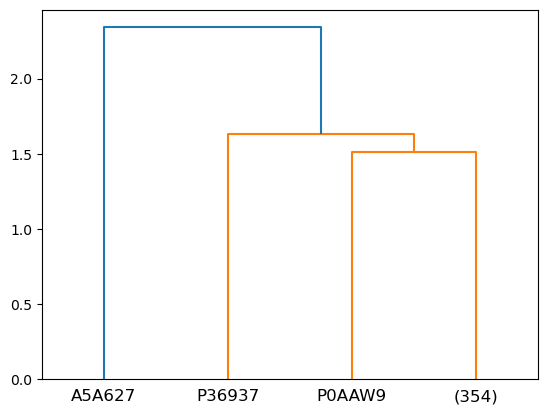

P33590    1
P75851    1
P39352    1
P0A742    1
P0A9R7    1
         ..
P60844    1
P0AFK4    1
P10384    1
P10903    1
P10905    1
Length: 357, dtype: int32

A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


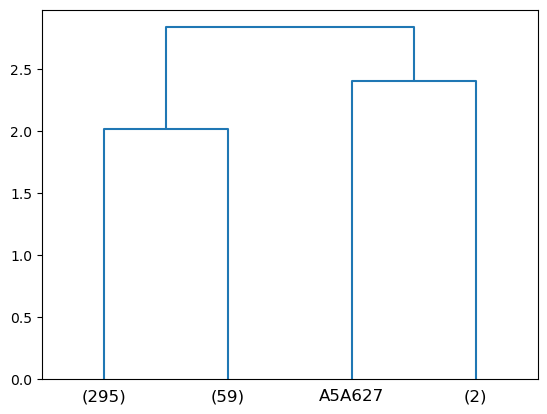

P33590    1
P75851    1
P39352    1
P0A742    1
P0A9R7    1
         ..
P60844    1
P0AFK4    1
P10384    1
P10903    1
P10905    1
Length: 357, dtype: int32

P0AAW9    2
A5A627    2
P36937    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P0AAW9,acrZ ybhT b0762 JW5102,Multidrug efflux pump accessory protein AcrZ (...,True,1,MLELLKSLVFAVIMVPVVMAIILGLIYGLGEVFNIFSGVGKKDQPGQNH,83333
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333
P36937,kdpF b4513 JW0687,Potassium-transporting ATPase KdpF subunit (AT...,True,1,MSAGVITGVLLVFLLLGYLVYALINAEAF,83333


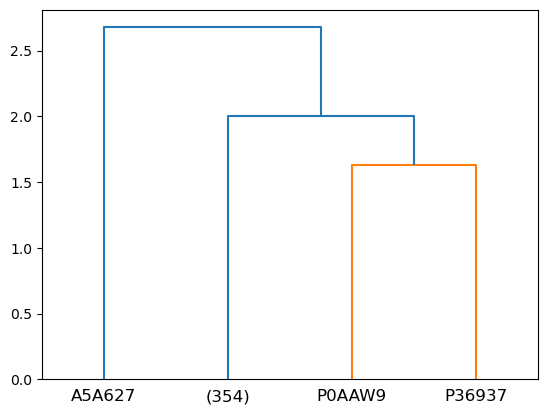

P33590    1
P75851    1
P39352    1
P0A742    1
P0A9R7    1
         ..
P60844    1
P0AFK4    1
P10384    1
P10903    1
P10905    1
Length: 357, dtype: int32

A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


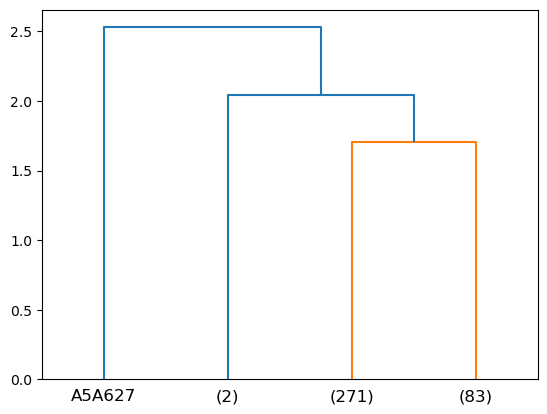

P33590    1
P75851    1
P39352    1
P0A742    1
P0A9R7    1
         ..
P60844    1
P0AFK4    1
P10384    1
P10903    1
P10905    1
Length: 357, dtype: int32

A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


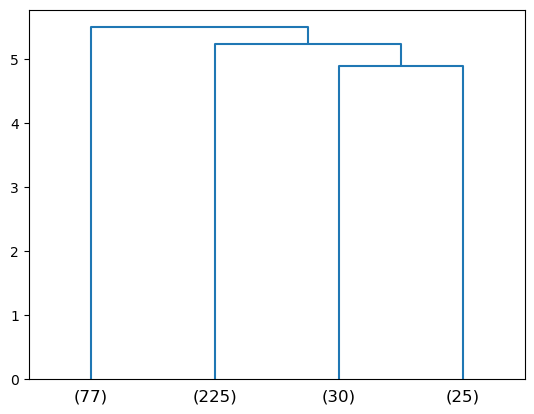

P33590    2
P75851    2
P39352    1
P0A742    1
P0A9R7    2
         ..
P60844    1
P0AFK4    2
P10384    2
P10903    2
P10905    2
Length: 357, dtype: int32

P33590    2
P75851    2
P0A9R7    2
P07654    2
P02916    2
         ..
P0AFT2    2
P0AFK4    2
P10384    2
P10903    2
P10905    2
Length: 280, dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
P33590,nikA b3476 JW3441,Nickel-binding periplasmic protein,True,1,MLSTLRRTLFALLACASFIVHAAAPDEITTAWPVNVGPLNPHLYTP...,83333
P75851,ssuC ycbM b0934 JW5121,Putative aliphatic sulfonates transport permea...,True,1,MATPVKKWLLRVAPWFLPVGIVAVWQLASSVGWLSTRILPSPEGVV...,83333
P0A9R7,ftsE b3463 JW3428,Cell division ATP-binding protein FtsE,True,1,MIRFEHVSKAYLGGRQALQGVTFHMQPGEMAFLTGHSGAGKSTLLK...,83333
P07654,pstA phoT b3726 JW3704,Phosphate transport system permease protein PstA,True,1,MAMVEMQTTAALAESRRKMQARRRLKNRIALTLSMATMAFGLFWLI...,83333
P02916,malF b4033 JW3993,Maltose/maltodextrin transport system permease...,True,1,MDVIKKKHWWQSDALKWSVLGLLGLLVGYLVVLMYAQGEYLFAITT...,83333
...,...,...,...,...,...,...
P0AFT2,tcyL yecS b1918 JW1903,L-cystine transport system permease protein TcyL,True,1,MQESIQLVIDSLPFLLKGAGYTLQLSIGGMFFGLLLGFILALMRLS...,83333
P0AFK4,potB b1125 JW1111,Spermidine/putrescine transport system permeas...,True,1,MIVTIVGWLVLFVFLPNLMIIGTSFLTRDDASFVKMVFTLDNYTRL...,83333
P10384,fadL ttr b2344 JW2341,Long-chain fatty acid transport protein (Outer...,True,1,MSQKTLFTKSALAVAVALISTQAWSAGFQLNEFSSSGLGRAYSGEG...,83333
P10903,narK b1223 JW1214,Nitrate/nitrite antiporter NarK (Nitrate/nitri...,True,1,MSHSSAPERATGAVITDWRPEDPAFWQQRGQRIASRNLWISVPCLL...,83333


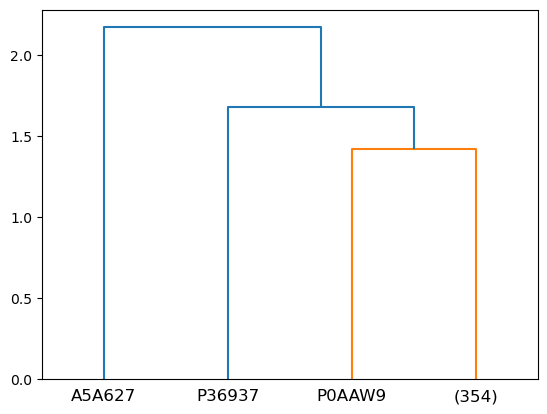

P33590    1
P75851    1
P39352    1
P0A742    1
P0A9R7    1
         ..
P60844    1
P0AFK4    1
P10384    1
P10903    1
P10905    1
Length: 357, dtype: int32

A5A627    2
dtype: int32

,gene_names,protein_names,reviewed,protein_existence,sequence,organism_id
A5A627,tisB ysdB b4618 JW3649,Small toxic protein TisB (LexA-regulated prote...,True,1,MNLVDIAILILKLIVAALQLLDAVLKYLK,83333


In [54]:
import matplotlib.pyplot as plt

for method in ["single","complete","average","weighted","ward","median"]:
    linkage = hierarchy.linkage(feature_protnlm, method=method, metric="euclidean")
    dendrogram = hierarchy.dendrogram(linkage, truncate_mode="lastp", p=4, labels=feature_protnlm.index)
    plt.show()
    labels = hierarchy.fcluster(linkage, criterion="maxclust", t=2)
    # labels = hierarchy.fcluster(linkage)
    labels = pd.Series(data=labels, index=feature_protnlm.index)
    labels.value_counts()
    display(labels)
    display(labels[labels==2])
    display(sequences.loc[labels[labels==2].index])

In [56]:
# TODO embeddings cosine distance beim clustering
# TODO try specialized R packages for GO enrichment and compare
# TODO analyze subclusters
# TODO compare features: different PSSMs, combined pssms, embeddings
# TODO turn double for loop into method!
# TODO turn code into py file!
    # Create dendrogram from feature df; and plot it (dataframe, )
    # Get the proteins in the clusters
    # Get enrichment for each cluster and each annotation dataset.
# TODO tcdb enrichment
# TODO rand metric?